<a href="https://colab.research.google.com/github/IgorvH-Developer/ColaboratoryFailes/blob/main/BostonHouse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import random
import pandas as  pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

random.seed(0)
np.random.seed(0)
torch.manual_seed(0)
torch.cuda.manual_seed(0)
torch.backends.cudnn.deterministic = True

from google.colab import drive


In [ ]:
device = torch.device("cuda")

In [ ]:
import sklearn.datasets
boston = sklearn.datasets.load_boston()
boston.data.shape

(506, 13)

In [ ]:
X_train = torch.tensor(boston.data[0:460])
y_train = torch.tensor(boston.target[0:460])
X_test = torch.tensor(boston.data[460:506])
y_test = torch.tensor(boston.target[460:506])

In [ ]:
X_train.requires_grad_()
y_train.requires_grad_()
X_test.requires_grad_()
y_test.requires_grad_()

y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1);

In [ ]:
y_test.size()

torch.Size([46, 1])

In [ ]:
class GuessPrice(torch.nn.Module):
    def __init__(self, n_hidden_neurons):
        super(GuessPrice, self).__init__()
        
        self.fc1 = torch.nn.Linear(13, n_hidden_neurons)
        self.activ1 = torch.nn.Sigmoid()
        self.fc2 = torch.nn.Linear(n_hidden_neurons, n_hidden_neurons)
        self.activ2 = torch.nn.Sigmoid()
        self.fc5 = torch.nn.Linear(n_hidden_neurons, 1)
        
    def forward(self,x):
        x = self.fc1(x)
        x = self.activ1(x)
        x = self.fc2(x)
        x = self.activ2(x)
        x = self.fc5(x)
        return x

    
bostonPrice_net = GuessPrice(5)

In [ ]:
def loss(preds, target):
    square = ((preds - target) ** 2).mean()
    return square

optimizer = torch.optim.Adam (bostonPrice_net.parameters(), 
                             lr=0.0005)


In [ ]:
batch_size = 460
loss_history = [[0,0] for i in range(50000)]
metric_history = [[0,0] for i in range(50000)]

for epoch in range(7700):
    order = np.random.permutation(len(X_train))
    for start_index in range(0, len(X_train), batch_size):
        optimizer.zero_grad()
        
        batch_indexes = order[start_index:start_index+batch_size]
        
        x_batch = X_train[batch_indexes]
        y_batch = y_train[batch_indexes]
        
        preds = bostonPrice_net.forward(x_batch.float()) 
        
        loss_value = loss(preds, y_batch)
        loss_value.backward()

        loss_history[epoch][0] = epoch
        loss_history[epoch][1] = loss_value.data.numpy().tolist()
        metric_history[epoch][0] = epoch
        test_preds = bostonPrice_net.forward(X_test.float())
        metric_history[epoch][1] = (((test_preds - y_test) ** 2) ** 0.5).mean().detach().numpy().tolist()
        
        optimizer.step()
        
    if epoch % 100 == 0:
        test_preds = bostonPrice_net.forward(X_test.float())
        print(abs(test_preds - y_test).mean())
        #print(loss( test_preds ,y_test))

tensor(19.0374, dtype=torch.float64, grad_fn=<MeanBackward0>)
tensor(18.7738, dtype=torch.float64, grad_fn=<MeanBackward0>)
tensor(18.5503, dtype=torch.float64, grad_fn=<MeanBackward0>)
tensor(18.3320, dtype=torch.float64, grad_fn=<MeanBackward0>)
tensor(18.1108, dtype=torch.float64, grad_fn=<MeanBackward0>)
tensor(17.8758, dtype=torch.float64, grad_fn=<MeanBackward0>)
tensor(17.6274, dtype=torch.float64, grad_fn=<MeanBackward0>)
tensor(17.3634, dtype=torch.float64, grad_fn=<MeanBackward0>)
tensor(17.0851, dtype=torch.float64, grad_fn=<MeanBackward0>)
tensor(16.7912, dtype=torch.float64, grad_fn=<MeanBackward0>)
tensor(16.4808, dtype=torch.float64, grad_fn=<MeanBackward0>)
tensor(16.1572, dtype=torch.float64, grad_fn=<MeanBackward0>)
tensor(15.8281, dtype=torch.float64, grad_fn=<MeanBackward0>)
tensor(15.5004, dtype=torch.float64, grad_fn=<MeanBackward0>)
tensor(15.1780, dtype=torch.float64, grad_fn=<MeanBackward0>)
tensor(14.8615, dtype=torch.float64, grad_fn=<MeanBackward0>)
tensor(1

In [ ]:
pr = bostonPrice_net.forward(X_test.float())
pr.size()

torch.Size([46, 1])

In [ ]:
y_test;

In [ ]:
loss(y_test,pr)
#pr - y_test

tensor(19.1097, dtype=torch.float64, grad_fn=<MeanBackward0>)

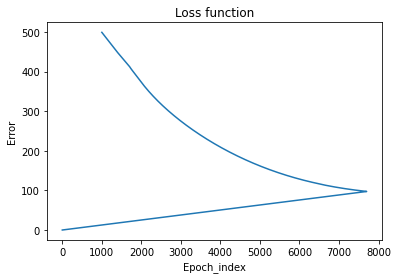

In [ ]:
plt.plot([row[0] for row in loss_history][1000:], [row[1] for row in loss_history][1000:])
plt.title(label='Loss function')
plt.xlabel('Epoch_index')
plt.ylabel('Error');
plt.show()

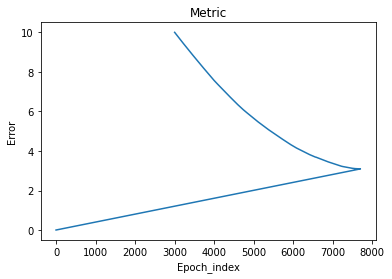

In [ ]:
plt.plot([row[0] for row in metric_history][3000:12000], [row[1] for row in metric_history][3000:12000])
plt.title(label='Metric')
plt.xlabel('Epoch_index')
plt.ylabel('Error');
plt.show()